
# Float vertical position simulation, ensta prototype


---

## Control

We assume that the float is only subjected to its weight and its Archimedean buoyant force :

$$
\begin{align}
\(m+\a) frac{dv_f}{dt} &= frac{rho_w -\ rho_f}{rho_f}~g \\

$$
It can be simplified as : 
$$
(m+\a) frac{dv_f}{dt} &= (rho_w (V+v) -\ m)~g \\ 
\end{align}
$$
where $g$ is the acceleration of gravity, $v_f$ is the downward velocity, $rho_f$ is the float density (assumed to be constant here as low variations of pressure and temperature are supposed), $m$ its mass, $a$ its added mass, $rho_w$ the water density, $V$ the bulk of the float volume that may be affected by pressure and temperature and $v$ is the volume taken in and out by the pump/piston, v is supposed to depend on the time and to be shaped like $ut$ where u is the piston flow (the piston is supposed to leave the cylinder of the float with a constant velocity $u$)

At the equilibrium (t=0), the float is supposed to be motionless, that is to say the weight of the float and its Archimedean buoyant force associated to the volume V balance each other out, hence :

$$
\begin{align}
(m+\a) frac{dv_f}{dt} &= rho_w v~g \\ 

(m+\a) frac{dv_f}{dt} &= rho_w u t ~g \\ 
\end{align}
$$


In [10]:
%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
'''
parameters:
    g : gravity acceleration [m.s^-2]
    m : float mass [kg]
    a : float added mass [kg]
    r : float radius [m]
    L : float length [m]
    V : float volume [m^3] (optional)
    rho_w : water density [kg.m^3]
    omega :  current rotation rate [rad/s]
    lead : screw lead (i.e. displacement after one screw revolution) [m]
    r_piston : piston radius [m]
    u : piston flow [m^3.s^-1]
'''
def omega2dvdt(omega=12.4*2.*np.pi/60., lead=0.0175, r_piston=0.025):

    '''
    Function computing the piston flow u
    parameters:
        omega: float [rad/s]
            current rotation rate, omega=dphi/dt
            for ENSTA float, omega_max = 124.*2.*np.pi/60.,
            omega_min = 12.4*2.*np.pi/60.
        lead: float [m]
            screw lead (i.e. displacement after one screw revolution)
            d = phi/2/pi x lead
        r_piston: float [m]
            piston radius
    '''
    return omega*lead/2.*r_piston**2



In [11]:
g = 9.81 #m.s^-2
rho_w = 997 #kg.m^3

params = {'r': 0.06, 'L': 0.5, 'a': 1., 'omega' : 12.4*2.*np.pi/60., 'lead' : 0.0175, 'r_piston' : 0.025}
params['m'] = 1000. * np.pi * params['r'] ** 2 * params['L']
if 'V' not in params:
    params['V'] = np.pi*params['r']**2*params['L']

params['u'] = omega2dvdt(params['omega'], params['lead'], params['r_piston'])


def zf(t, params):

    '''
    Function computing the float position depending on time and float parameters
    for initial conditions zf = 0 and vf = 0 at the beginning
    '''

    return (params['u']*g*rho_w*t**3) / 6*params['m']*(1+params['a'])
def vf(t, params):

    '''
    Function computing the float speed depending on time and float parameters
    for initial conditions zf = 0 and vf = 0 at the beginning
    '''

    return (params['u']*g*rho_w*t**2) / 2*params['m']*(1+params['a'])


def tv(v, params):

    '''
    Function computing the time necessary for the float to reach the speed v
    '''

    return np.sqrt(2*v*params['m']*(1+params['a'])/(g*rho_w*params['u']))

def zv(v, params):

    '''
    Function computing the distance necessary for the float to reach the speed v
    '''

    return zf(tv(v,params),params)



---

## Simulation



Text(0.5, 1.0, 'Necessary depth for the float to reach a given speed with a = 3 and u = 7.10130839405193e-05')

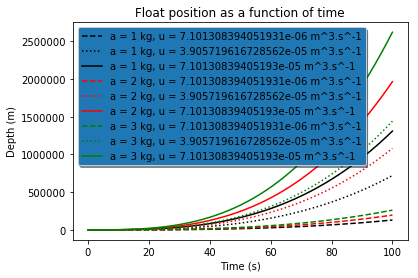

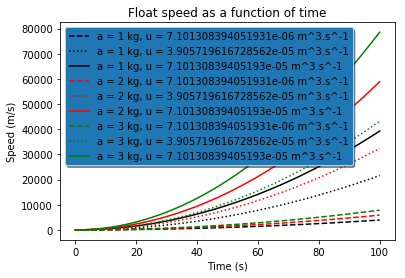

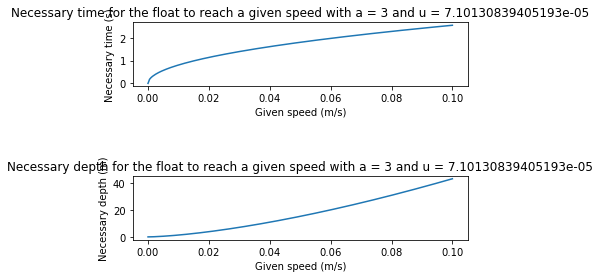

In [12]:
''' Float position as a function of time, depending on the added mass (a) and the piston flow u '''
t = np.linspace(0,100,200)
fig, ax = plt.subplots()
params['omega'] = 12.4*2.*np.pi/60.
params['u'] = omega2dvdt(params['omega'], params['lead'], params['r_piston'])
params['a'] = 1
ax.plot(t, zf(t, params),'k--', c = 'black' ,label='a = {} kg, u = {} m^3.s^-1'.format(params['a'],params['u']))

params['omega'] = (12.4*2.*np.pi/60. + 124.*2.*np.pi/60.)/2
params['u'] = omega2dvdt(params['omega'], params['lead'], params['r_piston'])
params['a'] = 1
ax.plot(t, zf(t, params),'k:', c = 'black', label='a = {} kg, u = {} m^3.s^-1'.format(params['a'],params['u']))

params['omega'] = 124.*2.*np.pi/60.
params['u'] = omega2dvdt(params['omega'], params['lead'], params['r_piston'])
params['a'] = 1
ax.plot(t, zf(t, params),'k', c = 'black', label='a = {} kg, u = {} m^3.s^-1'.format(params['a'],params['u']))

params['omega'] = 12.4*2.*np.pi/60.
params['u'] = omega2dvdt(params['omega'], params['lead'], params['r_piston'])
params['a'] = 2
ax.plot(t, zf(t, params),'k--', c = 'red' ,label='a = {} kg, u = {} m^3.s^-1'.format(params['a'],params['u']))

params['omega'] = (12.4*2.*np.pi/60. + 124.*2.*np.pi/60.)/2
params['u'] = omega2dvdt(params['omega'], params['lead'], params['r_piston'])
params['a'] = 2
ax.plot(t, zf(t, params),'k:', c = 'red', label='a = {} kg, u = {} m^3.s^-1'.format(params['a'],params['u']))

params['omega'] = 124.*2.*np.pi/60.
params['u'] = omega2dvdt(params['omega'], params['lead'], params['r_piston'])
params['a'] = 2
ax.plot(t, zf(t, params),'k', c = 'red', label='a = {} kg, u = {} m^3.s^-1'.format(params['a'],params['u']))

params['omega'] = 12.4*2.*np.pi/60.
params['u'] = omega2dvdt(params['omega'], params['lead'], params['r_piston'])
params['a'] = 3
ax.plot(t, zf(t, params),'k--', c = 'green' ,label='a = {} kg, u = {} m^3.s^-1'.format(params['a'],params['u']))

params['omega'] = (12.4*2.*np.pi/60. + 124.*2.*np.pi/60.)/2
params['u'] = omega2dvdt(params['omega'], params['lead'], params['r_piston'])
params['a'] = 3
ax.plot(t, zf(t, params),'k:', c = 'green', label='a = {} kg, u = {} m^3.s^-1'.format(params['a'],params['u']))

params['omega'] = 124.*2.*np.pi/60.
params['u'] = omega2dvdt(params['omega'], params['lead'], params['r_piston'])
params['a'] = 3
ax.plot(t, zf(t, params),'k', c = 'green', label='a = {} kg, u = {} m^3.s^-1'.format(params['a'],params['u']))

plt.xlabel('Time (s)')
plt.ylabel('Depth (m)')
plt.title('Float position as a function of time')
legend = ax.legend(loc='best', shadow=True, fontsize='medium')
legend.get_frame().set_facecolor('C0')

''' Float speed as a function of time, depending on the added mass (a) and the piston flow u '''

fig, ax = plt.subplots()
params['omega'] = 12.4*2.*np.pi/60.
params['u'] = omega2dvdt(params['omega'], params['lead'], params['r_piston'])
params['a'] = 1
ax.plot(t, vf(t, params),'k--', c = 'black' ,label='a = {} kg, u = {} m^3.s^-1'.format(params['a'],params['u']))

params['omega'] = (12.4*2.*np.pi/60. + 124.*2.*np.pi/60.)/2
params['u'] = omega2dvdt(params['omega'], params['lead'], params['r_piston'])
params['a'] = 1
ax.plot(t, vf(t, params),'k:', c = 'black', label='a = {} kg, u = {} m^3.s^-1'.format(params['a'],params['u']))

params['omega'] = 124.*2.*np.pi/60.
params['u'] = omega2dvdt(params['omega'], params['lead'], params['r_piston'])
params['a'] = 1
ax.plot(t, vf(t, params),'k', c = 'black', label='a = {} kg, u = {} m^3.s^-1'.format(params['a'],params['u']))

params['omega'] = 12.4*2.*np.pi/60.
params['u'] = omega2dvdt(params['omega'], params['lead'], params['r_piston'])
params['a'] = 2
ax.plot(t, vf(t, params),'k--', c = 'red' ,label='a = {} kg, u = {} m^3.s^-1'.format(params['a'],params['u']))

params['omega'] = (12.4*2.*np.pi/60. + 124.*2.*np.pi/60.)/2
params['u'] = omega2dvdt(params['omega'], params['lead'], params['r_piston'])
params['a'] = 2
ax.plot(t, vf(t, params),'k:', c = 'red', label='a = {} kg, u = {} m^3.s^-1'.format(params['a'],params['u']))

params['omega'] = 124.*2.*np.pi/60.
params['u'] = omega2dvdt(params['omega'], params['lead'], params['r_piston'])
params['a'] = 2
ax.plot(t, vf(t, params),'k', c = 'red', label='a = {} kg, u = {} m^3.s^-1'.format(params['a'],params['u']))

params['omega'] = 12.4*2.*np.pi/60.
params['u'] = omega2dvdt(params['omega'], params['lead'], params['r_piston'])
params['a'] = 3
ax.plot(t, vf(t, params),'k--', c = 'green' ,label='a = {} kg, u = {} m^3.s^-1'.format(params['a'],params['u']))

params['omega'] = (12.4*2.*np.pi/60. + 124.*2.*np.pi/60.)/2
params['u'] = omega2dvdt(params['omega'], params['lead'], params['r_piston'])
params['a'] = 3
ax.plot(t, vf(t, params),'k:', c = 'green', label='a = {} kg, u = {} m^3.s^-1'.format(params['a'],params['u']))

params['omega'] = 124.*2.*np.pi/60.
params['u'] = omega2dvdt(params['omega'], params['lead'], params['r_piston'])
params['a'] = 3
ax.plot(t, vf(t, params),'k', c = 'green', label='a = {} kg, u = {} m^3.s^-1'.format(params['a'],params['u']))

plt.xlabel('Time (s)')
plt.ylabel('Speed (m/s)')
plt.title('Float speed as a function of time')
legend = ax.legend(loc='best', shadow=True, fontsize='medium')
legend.get_frame().set_facecolor('C0')

''' Necessary time for the float to reach a given speed '''
v = np.linspace(0, 0.1,200)
plt.figure()
plt.subplot(3,1,1)
plt.plot(v, tv(v,params))
plt.xlabel('Given speed (m/s)')
plt.ylabel('Necessary time (s)')
plt.title('Necessary time for the float to reach a given speed with a = {} and u = {}'.format(params['a'], params['u']))

''' Necessary depth for the float to reach a given speed '''
plt.subplot(3,1,3)
plt.plot(v, zv(v,params))
plt.xlabel('Given speed (m/s)')
plt.ylabel('Necessary depth (m)')
plt.title('Necessary depth for the float to reach a given speed with a = {} and u = {}'.format(params['a'], params['u']))

